# ESTI019 - QS2020 - CSM - Minami

# Lab3 - Codificação de Imagem por DCT e Animação

In [101]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [115]:
from google.colab import drive
!ls -l "/content"   # verifica se montou o drive e se os arquivos estão lá...
bgr1 = cv.imread('/content/FotosGrupo.png') # leitura no formato BGR!s
altura, largura, camadas = bgr1.shape
print("Resolução: ", largura, " x ", altura, "PIXELS. ", camadas, " camadas.")

total 15664
-rw-r--r-- 1 root root 7105936 Oct 21 01:27  FotosGrupo.png
-rw-r--r-- 1 root root  110957 Oct 21 01:30  Grupo05.jpg
-rw-r--r-- 1 root root  204984 Oct 21 01:30  Grupo25.jpg
-rw-r--r-- 1 root root 1075252 Oct 21 01:29  GrupoBGR.jpg
-rw-r--r-- 1 root root     338 Oct 21 01:30 'GrupoBloco Original.jpg'
-rw-r--r-- 1 root root     333 Oct 21 01:30 'GrupoBloco Reconstruído com Zeros.jpg'
-rw-r--r-- 1 root root 1222035 Oct 21 01:29  GrupoHSV.jpg
-rw-r--r-- 1 root root  256463 Oct 21 01:30 'GrupoJPEG fator 05.jpg'
-rw-r--r-- 1 root root  499448 Oct 21 01:30 'GrupoJPEG fator 25.jpg'
-rw-r--r-- 1 root root  537909 Oct 21 01:29 'GrupoRGB_Camada B.jpg'
-rw-r--r-- 1 root root  993662 Oct 21 01:29 'GrupoRGB_Camada G.jpg'
-rw-r--r-- 1 root root  775120 Oct 21 01:29 'GrupoRGB_Camada R.jpg'
-rw-r--r-- 1 root root 1062511 Oct 21 01:29  GrupoRGB.jpg
-rw-r--r-- 1 root root  192333 Oct 21 01:29  GrupoYCrCb_Cb.jpg
-rw-r--r-- 1 root root  180890 Oct 21 01:29  GrupoYCrCb_Cr.jpg
-rw-r--r-- 1 root 

Separa os canais e re-arranja para formar imagem RGB

In [103]:
b1, g1, r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])
# Q1 - O que foi feito aqui?
# Os canais RGB salvos pelo OpenCV vem invertidos do método imread (BGR) e aqui eles foram colocados de volta no lugar comum.

Imprime cores trocadas (BGR) e reais (RGB) 

True

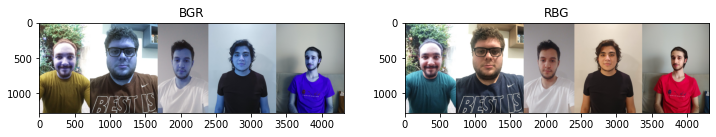

In [104]:
plt.figure(figsize=[12, 5])
plt.subplot(121); plt.imshow(bgr1); plt.title('BGR'); cv.imwrite('GrupoBGR.jpg', cv.cvtColor(bgr1, cv.COLOR_BGR2RGB))
plt.subplot(122); plt.imshow(rgb2); plt.title('RBG'); cv.imwrite('GrupoRGB.jpg', cv.cvtColor(rgb2, cv.COLOR_RGB2BGR))


Converte para os formatos YCrCb e HSV

True

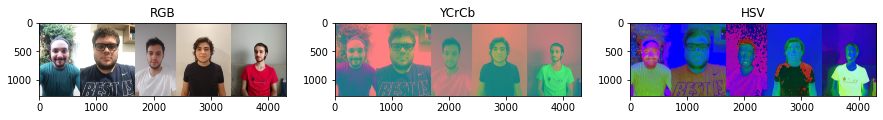

In [105]:
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb2); plt.title('RGB')
plt.subplot(132); plt.imshow(ycrcb); plt.title('YCrCb'); cv.imwrite('GrupoYCrCb.jpg', cv.cvtColor(ycrcb, cv.COLOR_RGB2BGR))
plt.subplot(133); plt.imshow(hsv); plt.title('HSV'); cv.imwrite('GrupoHSV.jpg', cv.cvtColor(hsv, cv.COLOR_RGB2BGR))

Separação das Camadas RGB individualmente

True

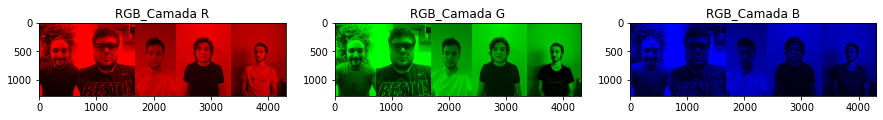

In [106]:
imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
imageG = rgb2.copy()
imageG[:, :, 0] = 0; imageG[:, :, 2] = 0
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0     
# Q2 - O que foi feito aqui?
#Foram criadas cópias da matriz original RGB e salvas apenas um dos canais de cor R, G ou B.

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(imageR); plt.title('RGB_Camada R'); cv.imwrite('GrupoRGB_Camada R.jpg', cv.cvtColor(imageR, cv.COLOR_RGB2BGR))
plt.subplot(132); plt.imshow(imageG); plt.title('RGB_Camada G');cv.imwrite('GrupoRGB_Camada G.jpg', cv.cvtColor(imageG, cv.COLOR_RGB2BGR))
plt.subplot(133); plt.imshow(imageB); plt.title('RGB_Camada B'); cv.imwrite('GrupoRGB_Camada B.jpg', cv.cvtColor(imageB, cv.COLOR_RGB2BGR))

Separação dos Canais YCbCr

True

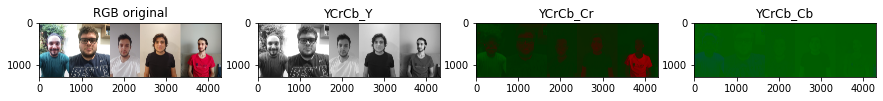

In [107]:
y1, cr1, cb1 = cv.split(ycrcb)
imageCR = ycrcb.copy()
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr = cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb = cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgb2); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y'); cv.imwrite('GrupoYCrCb_Y.jpg', cv.cvtColor(y1, cv.COLOR_RGB2BGR))
plt.subplot(143); plt.imshow(Cr); plt.title('YCrCb_Cr'); cv.imwrite('GrupoYCrCb_Cr.jpg', cv.cvtColor(Cr, cv.COLOR_RGB2BGR))
plt.subplot(144); plt.imshow(Cb); plt.title('YCrCb_Cb'); cv.imwrite('GrupoYCrCb_Cb.jpg', cv.cvtColor(Cb, cv.COLOR_BGR2RGB))


# Com as Imagens do Grupo:


1.   Faça o mesmo com uma imagem de cada integrante do Grupo e
2.   Com a foto montagem de todos os do Grupo, lembrando das roupas com cores diferentes, preferencialmente (R, G e B).



********************************************************************************

*COMPRESSÃO DE IMAGENS COM PERDAS*

================================================================================


*   O formato JPEG permite compressão da imagem ao salvá-la num arquivo com o comando imwrite().

*   A compressão afeta a qualidade da imagem, sendo controlada pelo parâmetro IMWRITE_JPEG_QUALITY entre 0-100, sendo que quanto maior, melhor a qualidade. O default é 95.




True

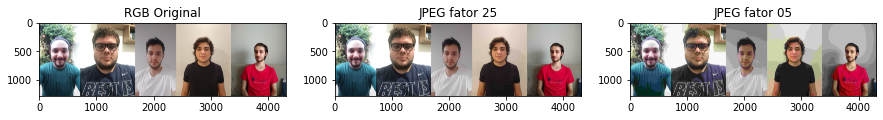

In [109]:
bgr = cv.imread('/content/FotosGrupo.png')  # formato BGR

# salva com menor qualidade, fatores 25 e 5
cv.imwrite('Grupo25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('Grupo05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# leitura para visualização e conversão para acertar a cor
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
bgr25 = cv.imread('Grupo25.jpg'); rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
bgr05 = cv.imread('Grupo05.jpg'); rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb); plt.title('RGB Original')
plt.subplot(132); plt.imshow(rgb25); plt.title('JPEG fator 25');cv.imwrite('GrupoJPEG fator 25.jpg', cv.cvtColor(rgb25, cv.COLOR_RGB2BGR))
plt.subplot(133); plt.imshow(rgb05); plt.title('JPEG fator 05');cv.imwrite('GrupoJPEG fator 05.jpg', cv.cvtColor(rgb05, cv.COLOR_RGB2BGR))

# COM AS FOTOS DO Grupo


1.   Repita o procedimento para cada uma das fotos dos integrantes do Grupo e para a foto-montagem do Grupo todo
2.   Leia o tamanho dos arquivos (em bytes) e faça uma tabela comparando os tamanhos originais e os comprimidos e calcule a porcentagem de compressão de cada arquivo destes tamanhos na tabela construída



********************************************************************************
# TRANSFORMADA DISCRETA COSSENO
********************************************************************************

Nesta parte calcule a DCT em bloco de 8x8 da imagem, referente à bola

In [118]:
img = cv.imread('/content/messi.jpg')
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bola = y[280:340, 330:390]
h, w = bola.shape

cx = round(w/2)
cy = round(h/2)

# Escolhendo um pedaço da imagem "BOLA"
bloco8x8 = bola[cx-4:cx+4, cy-4:cy+4]
print("(1)"); print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
dct8x8f = cv.dct(bloco8x8f)   # calcula a DCT
dct8x8 = np.int64( (dct8x8f*255.0)) # coversão para inteiro

print("(2)"); print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)"); print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)"); print("DCT de Y (formato inteiro)")
print(dct8x8)



(1)
Matriz 8x8: componente Y original
[[252 252 252 252 254 254 254 254]
 [253 253 253 253 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 254 254 254 254]
 [255 255 255 255 254 254 254 254]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.99 0.99 0.99 0.99 1.   1.   1.   1.  ]
 [0.99 0.99 0.99 0.99 1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.  ]]
(3)
DCT de Y (ponto flutuante)
[[ 7.98 -0.    0.    0.    0.   -0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.   -0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.   -0.    0.    0.  ]
 [-0.01  0.    0.   -0.    0.    0.    0.   -0.  ]
 [-0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.  

ZERANDO manualmente da diagonal da DCT as componentes AC

In [116]:
dct8x8fz = dct8x8f.copy()
dct8x8fz[0,7] = 0
dct8x8fz[1,6:8] = 0
dct8x8fz[2,5:8] = 0
dct8x8fz[3,4:8] = 0
dct8x8fz[4,3:8] = 0
dct8x8fz[5,2:8] = 0
dct8x8fz[6,1:8] = 0
dct8x8fz[7,0:8] = 0
print( np.around(dct8x8fz, decimals = 2))


[[ 7.98 -0.    0.    0.    0.   -0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.   -0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.01  0.    0.   -0.    0.    0.    0.    0.  ]
 [-0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.    0.    0.    0.    0.    0.    0.  ]
 [-0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Bloco Original e Reconstruído com Zeros das componentes AC da diagonal para baixo zerados

True

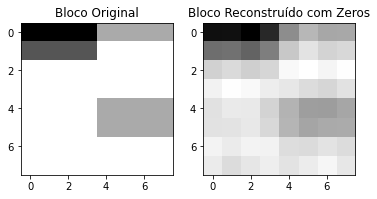

In [119]:
bloco8x8recz = cv.idct(dct8x8fz)

plt.subplot(121); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original'); cv.imwrite('GrupoBloco Original.jpg', bloco8x8)
plt.subplot(122); plt.imshow(bloco8x8recz,'gray'); plt.title('Bloco Reconstruído com Zeros'); cv.imwrite('GrupoBloco Reconstruído com Zeros.jpg', bloco8x8recz)


# Escolha outro bloco de 8x8 da imagem e:
 

1.   refaça este procedimento zerando mais DUAS DIAGONAIS ACIMA DA PRINCIPAL além destas
2.   Compare e comente as imagens do bloco original e reconstruída


[[ 7.98 -0.    0.    0.    0.    0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.01 -0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


True

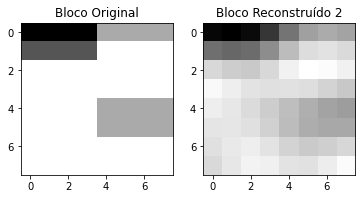

In [126]:
dct8x8fw = dct8x8f.copy()
dct8x8fw[0,5:8] = 0
dct8x8fw[1,4:8] = 0
dct8x8fw[2,3:8] = 0
dct8x8fw[3,2:8] = 0
dct8x8fw[4,1:8] = 0
dct8x8fw[5,0:8] = 0
dct8x8fw[6,0:8] = 0
dct8x8fw[7,0:8] = 0

print( np.around(dct8x8fw, decimals = 2))

bloco8x8recw = cv.idct(dct8x8fw)

plt.subplot(121); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original')
plt.subplot(122); plt.imshow(bloco8x8recw,'gray'); plt.title('Bloco Reconstruído 2'); cv.imwrite('GrupoBloco Reconstruído com duas Colunas de Zeros.jpg', bloco8x8recw)